In [1]:
import numpy as np
import random #not good practice
import matplotlib.pyplot as plt
import math 
import statistics
from scipy import stats
import seaborn as sns

# 2D Gaussian Metropolis Hasting

In [9]:
def Gaussian_Metropolis_Hasting(number_of_trials,mu,sigma):
    
    accepted=[0,0]
    states = [] # the states of the MH
    
    current=[0,0]
    current[0] = random.uniform(-sigma[0]+mu[0],sigma[0]+mu[0])#choose a random number (central) to begin
    current[1] = random.uniform(-sigma[1]+mu[1],sigma[1]+mu[1])#choose a random number (central) to begin
   
    kernel_width = [1,1] #random values to start with
    
    keep_up_to_date_kernel_counter = 0  
    
    for i in range(1,number_of_trials+1):#repeat per number of trials
        states.append(current) # add the current value to list of MH values
        
        predicted=[0,0]
        predicted[0] = random.uniform(current[0]-kernel_width[0],current[0]+kernel_width[0]) # predict a value, based off how close the running acceptance rate is to ideal 25-27%
        predicted[1] = random.uniform(current[1]-kernel_width[1],current[1]+kernel_width[1]) # predict a value, based off how close the running acceptance rate is to ideal 25-27%

        probability_of_current=[0,0]
        probability_of_current[0] = (np.exp((-(current[0]-mu[0])**2)/(2*sigma[0]**2))) #probability of current value given known distributuin
        probability_of_current[1] = (np.exp((-(current[1]-mu[1])**2)/(2*sigma[1]**2)))  #probability of current value given known distributuin

        probability_of_predicted=[0,0]
        probability_of_predicted[0] = (np.exp((-(predicted[0]-mu[0])**2)/(2*sigma[0]**2)))  #probability of predicted value given known distributuin
        probability_of_predicted[1] = (np.exp((-(predicted[1]-mu[1])**2)/(2*sigma[1]**2)))  #probability of predicted value given known distributuin

        total_probability_current= probability_of_current[0] * probability_of_current[1]
        total_probability_predicted= probability_of_predicted[0] * probability_of_predicted[1]
        
        acceptance = min(total_probability_predicted/total_probability_current,1) # if the proability of predicted is grater than current given the known distribution
        
        if random.uniform(0,1)<acceptance: #if the probability of the predicted value is greater than a random float accept it. if not... do nothing
            current = predicted #set the current value to the predicted one
            accepted[0]=accepted[0]+1
            accepted[1]=accepted[1]+1
            
        if accepted[0]/i > 0.27: #if the acceptance rate is too high > 27% 
            kernel_width[0] = kernel_width[0] - ((accepted[0]/i)-0.25)# make sure it requires a closer number to current next iteration
        if accepted[1]/i > 0.27: #if the acceptance rate is too high > 27% 
            kernel_width[1] = kernel_width[1] - ((accepted[1]/i)-0.25)# make sure it requires a closer number to current next iteration

        if accepted[0]/i < 0.25: #if the acceptance rate is too high > 27% make sure its decreased next iteration
            kernel_width[0] = kernel_width[0] + (0.27-(accepted[0]/(i))) # make sure it requires a further number to current next iteration
        if accepted[1]/i < 0.25: #if the acceptance rate is too high > 27% make sure its decreased next iteration
            kernel_width[1] = kernel_width[1] + (0.27-(accepted[1]/(i))) # make sure it requires a further number to current next iteration
        
        
        keep_up_to_date_kernel_counter= keep_up_to_date_kernel_counter+1
        if keep_up_to_date_kernel_counter==15: # we want to restart counting the accepted rate after the warm up period
            accepted[0]=int(0.26*i) #remove any inconsitency from the warm up period
            accepted[1]=int(0.26*i) #remove any inconsitency from the warm up period
            keep_up_to_date_kernel_counter=0
    return states ,accepted;# [burn_in:] # uncomment if having a warm up 20%




### Setting Parameters ###
mu=[10,12]
number_of_trials=1000
sigma=[1,2] #larger sigmas can have a impact on the acceptance rate. 
number_of_stacks=20 # number of recatngles on graph

MH_predictions,accepted =  Gaussian_Metropolis_Hasting(number_of_trials,mu=mu,sigma=sigma) # run the MH prediction: number of iterations, mean and variation. 


In [10]:
MH_predictions

[[10.985025900189667, 11.850950100422175],
 [10.985025900189667, 11.850950100422175],
 [10.180845320571885, 12.609999480845863],
 [10.690587301052775, 12.901128894706666],
 [10.877399864893771, 13.207107937953243],
 [10.977312230861331, 13.231156060562812],
 [11.372014596408608, 12.81345480009169],
 [11.372014596408608, 12.81345480009169],
 [11.92532014487783, 12.554754184556206],
 [11.92532014487783, 12.554754184556206],
 [11.474776571664673, 12.460168180457284],
 [9.893190937468585, 14.832373231703043],
 [10.628767930458558, 14.3238076924792],
 [10.628767930458558, 14.3238076924792],
 [10.628767930458558, 14.3238076924792],
 [10.628767930458558, 14.3238076924792],
 [10.628767930458558, 14.3238076924792],
 [9.114528796301276, 15.567292101851924],
 [9.114528796301276, 15.567292101851924],
 [9.114528796301276, 15.567292101851924],
 [8.273053321618466, 12.065099579759822],
 [8.273053321618466, 12.065099579759822],
 [8.273053321618466, 12.065099579759822],
 [10.131519539490458, 13.9050946

In [11]:
#the acceptance rate is based on the values after the warm up period
#to make the acceptance values include that of the warm up period comment out the lines as indicated above
print('Acceptance Rate:', round(accepted[0]*100/number_of_trials,2),'%') #print the acceptance rate - for accuracry purpose only
    

Acceptance Rate: 26.0 %


In [12]:
x=[]
y=[]
for i in range (0,len(MH_predictions)):
    x.append(MH_predictions[i][0])
    y.append(MH_predictions[i][1])

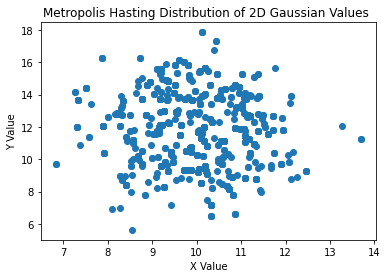

In [13]:

plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('Metropolis Hasting Distribution of 2D Gaussian Values ')

plt.scatter(x, y)
plt.show()

## Jarque-Bera Test

In [ ]:
skewness = 

In [ ]:
kurtosis = 

In [ ]:
BS = n[((skewness**2)/6)+(((kurtosis-3)**2)/24)]